# Kaggle Competition Final

In [3]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading in the Data

In [4]:
# read in the data from the csv file 
train = pd.read_csv('data/byu-data-science-capstone-classification/DSCapstoneKaggleTrain.csv')
test = pd.read_csv('data/byu-data-science-capstone-classification/DSCapstoneKaggleTest.csv')

# check the shape of the data
print(train.shape)
print(test.shape)

# check the first few rows of the data
train.head()

# check the data types of the columns
train.dtypes

# check for missing values
train.isnull().sum()

# check the distribution of the target variable
train['class'].value_counts()

(8000, 13)
(2000, 12)


0    4635
1    3365
Name: class, dtype: int64

### Analysis of the data

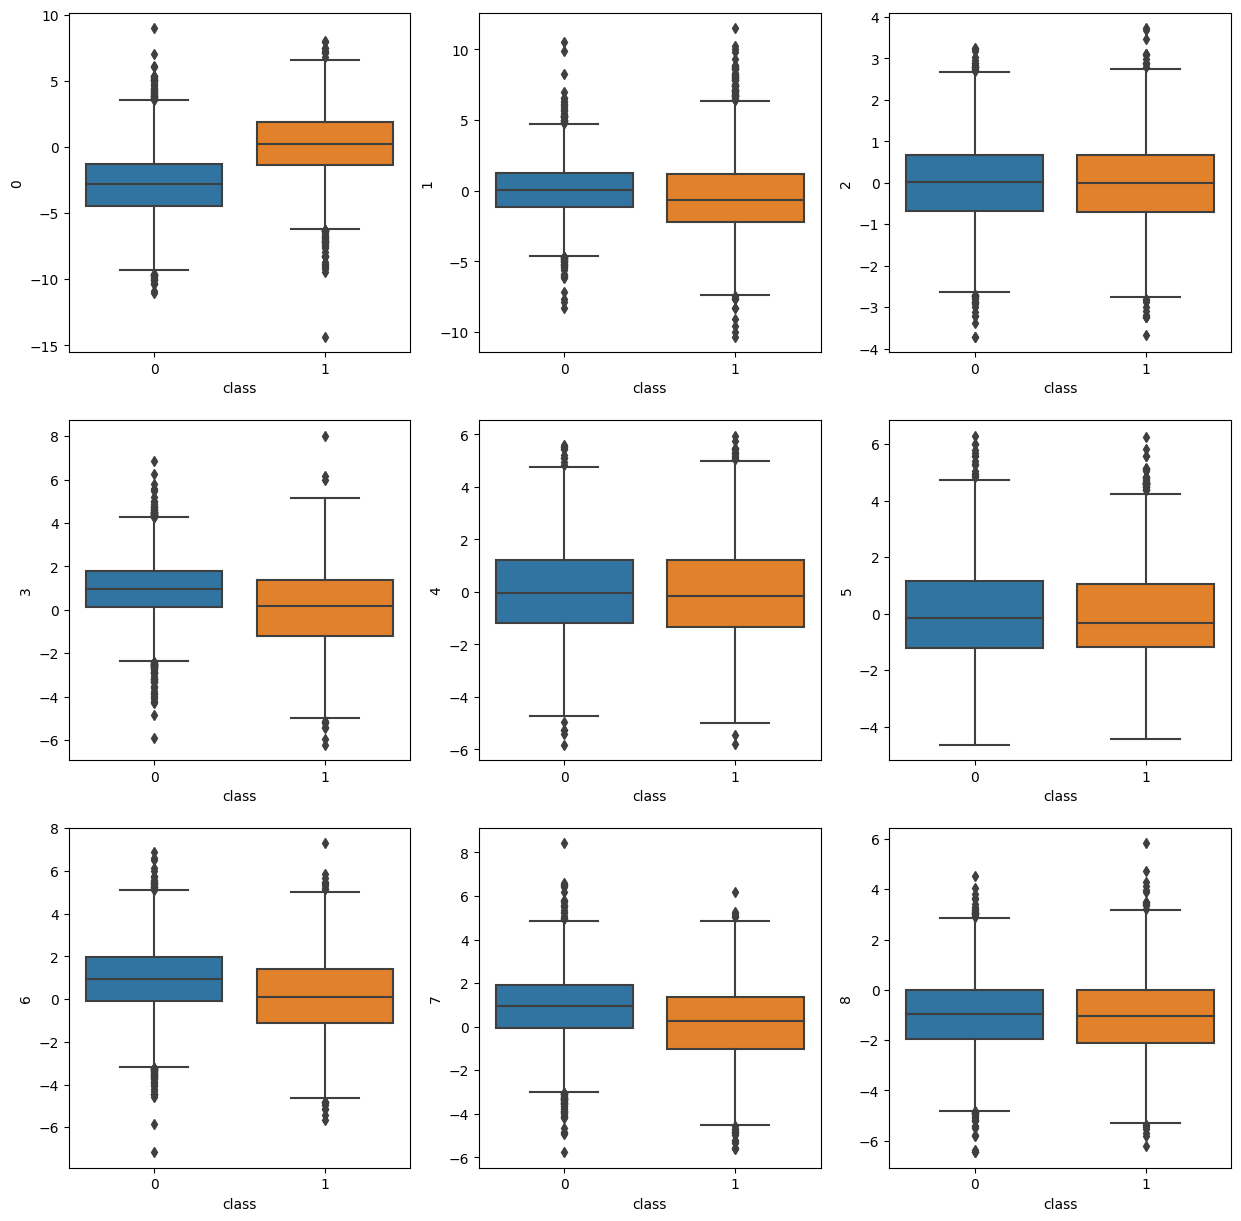

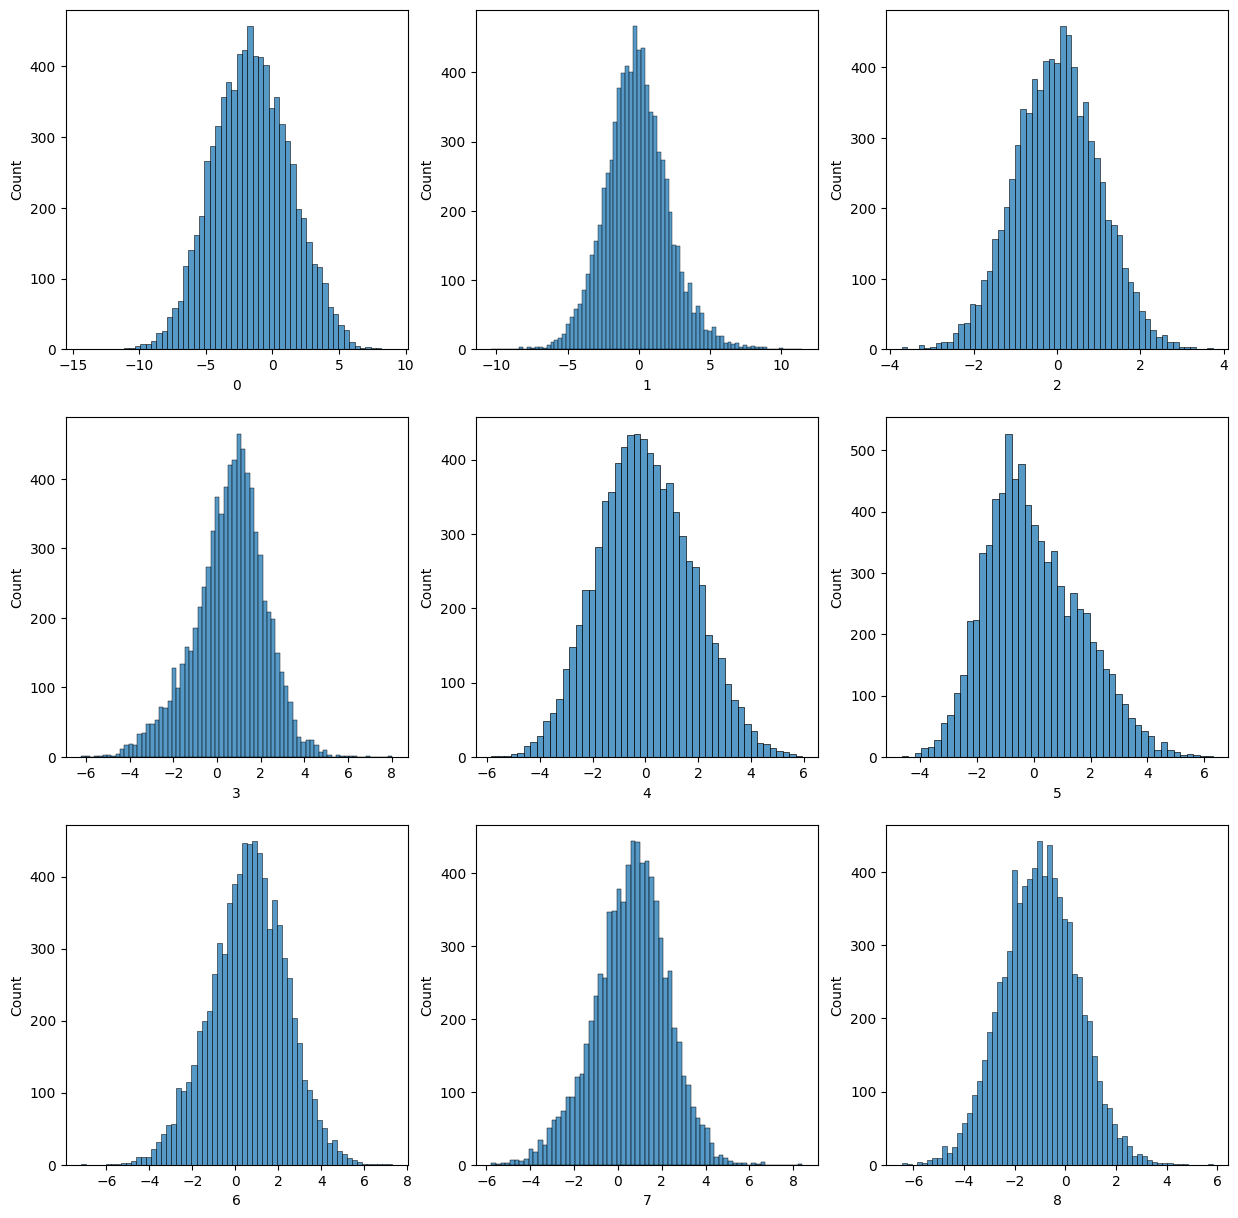

In [5]:
# make box plots for each of the features and put them in a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(train.columns[1:10]):
    sns.boxplot(x='class', y=col, data=train, ax=axes[i//3, i%3])

# make histograms for each of the features and put them in a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(train.columns[1:10]):
    sns.histplot(x=col, data=train, ax=axes[i//3, i%3])

<AxesSubplot: >

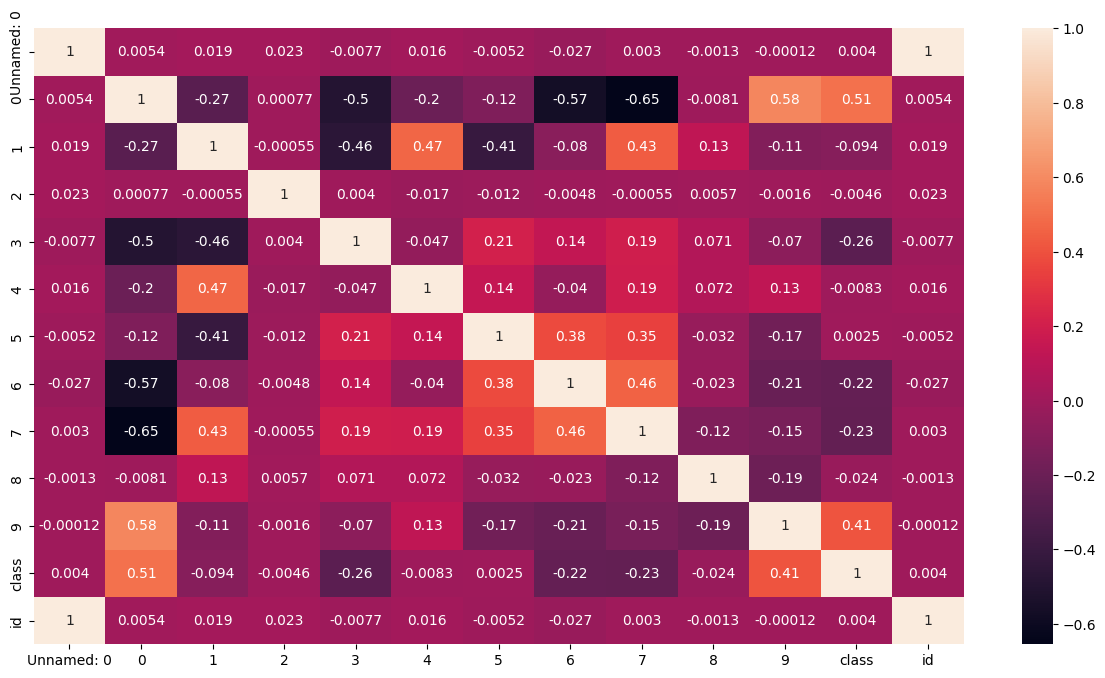

In [6]:
# make a correlation matrix but make the display bigger

plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True)

In [14]:
# normalize the data 
def normalize(df):
    df = (df - df.mean()) / df.std()
    return df

# split the data into X and y
X = train.drop('class', axis=1)
y = train['class']

# split the test data into X_test
X_test = test

# normalize the data
X = normalize(X)

# split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Model: KNN

In [17]:
# using the model KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# create the model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train, y_train)

# make predictions
y_pred = knn.predict(X_val)

# check the accuracy
print("ACCURACY: "+str(accuracy_score(y_val, y_pred)))




ACCURACY: 0.826875
